In [1]:
import csv
openfile = open("listings.csv", encoding="utf8", newline = "")
airbnb = csv.DictReader(openfile)
  
#creating a dictionary of all the neighborhood names
neighborhoods = []
for bnb in airbnb:
    if bnb['neighbourhood_cleansed'] not in neighborhoods:
        neighborhoods.append(bnb['neighbourhood_cleansed'])
                
#this creates a dictionary with the names of the neighborhoods as keys
neighborhoodName = {key:[] for key in neighborhoods}
#print(neighborhoodName)
                
#this creates a nested dictionary, each neighborhood has the dictionaries below in it
neighborhoodDict = {key:{'price':[],'average':[],'maxprice':[],'minprice':[],'averageincome':[]} for key in neighborhoodName}

openfile = open ("listings.csv", encoding="utf8",newline = "")
airbnb = csv.DictReader(openfile)

#this puts the prices of all the rentals in the neighborhood in the nest dictionary 'price'
for bnb in airbnb:
    for key in neighborhoodDict:
        if key == bnb['neighbourhood_cleansed']:            
            cleansedprice = bnb['price'].replace('$','')       #these next two lines clean the data, without them the prices are like this $1,000 
            cleansedprice = cleansedprice.replace(',','')
            neighborhoodDict[key]['price'].append(float(cleansedprice))
 
 #print(neighborhoodDict) 
                                                  
#this used the nested dictionary 'price' from above to find the maxprice, minprice, and average price of a neighborhood
for key in neighborhoodDict:
    priceList = neighborhoodDict[key]['price']
    neighborhoodDict[key]['maxprice'].append(max(priceList))
    neighborhoodDict[key]['minprice'].append(min(priceList))
    aveofList = sum(neighborhoodDict[key]['price'])/len(neighborhoodDict[key]['price'])
    neighborhoodDict[key]['average'].append(aveofList)
    
#print(neighborhoodDict)

In [2]:
import fiona
import folium
import json
openHoods = fiona.open('neighborhoods/neighborhoodsWincome.shp', 'r')

#print (openHoods)
hoodList = [] 
for hood in openHoods:
    hoodList.append(hood)

openHoods.close()
    
m = folium.Map(location = [30.003675, -90.077057], zoom_start=10)


for item in hoodList:
    j = json.dumps(item['geometry'])
    folium.features.GeoJson(j).add_to(m)
    #print(item)

m

In [3]:
import matplotlib.pyplot as plt

income = fiona.open('neighborhoods/neighborhoodsWincome.shp', 'r')

#this is the average income for an area
for i in income:
    for key in neighborhoodDict:
        if (i['properties']['GNOCDC_LAB']).lower() == key.lower(): 
            if len(neighborhoodDict[key]['averageincome']) < 1:
                if len(i['properties']['neworleans']) > 1:
                    floatVal = i['properties']['neworleans']
                    neighborhoodDict[key]['averageincome'].append(float(floatVal))
                else: 
                    neighborhoodDict[key]['averageincome'].append(0)
                
print(neighborhoodDict)



{'Garden District': {'price': [294.0, 650.0, 110.0, 241.0, 695.0, 97.0, 192.0, 192.0, 115.0, 250.0, 448.0, 500.0, 120.0, 275.0, 229.0, 71.0, 500.0, 125.0, 195.0, 700.0, 175.0, 150.0, 85.0, 350.0, 110.0, 200.0, 180.0, 255.0, 750.0, 175.0, 600.0, 150.0, 252.0, 99.0, 150.0, 109.0, 70.0, 140.0, 133.0, 75.0, 125.0, 192.0, 149.0, 650.0, 241.0, 139.0, 150.0, 395.0, 241.0, 135.0, 60.0, 450.0, 125.0, 250.0, 115.0, 143.0, 150.0, 700.0, 225.0, 99.0, 60.0, 275.0, 175.0], 'average': [245.25396825396825], 'maxprice': [750.0], 'minprice': [60.0], 'averageincome': [177172.0]}, 'Little Woods': {'price': [65.0, 55.0, 45.0, 65.0, 200.0, 400.0, 70.0, 65.0, 180.0, 80.0, 199.0, 100.0, 39.0, 90.0, 75.0, 50.0, 30.0, 75.0, 50.0, 93.0, 75.0, 150.0, 125.0, 75.0, 85.0, 85.0, 75.0], 'average': [99.85185185185185], 'maxprice': [400.0], 'minprice': [30.0], 'averageincome': [38507.0]}, 'Iberville': {'price': [139.0, 114.0, 190.0], 'average': [147.66666666666666], 'maxprice': [190.0], 'minprice': [114.0], 'averageinco

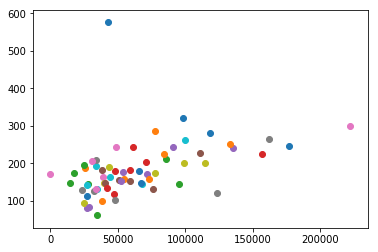

In [4]:
for keys in neighborhoodDict:
    if len(neighborhoodDict[keys]['averageincome']) > 0:
        y = neighborhoodDict[keys]['average']
        x = neighborhoodDict[keys]['averageincome']
        plt.scatter(x,y)
plt.show()
    


In [3]:
import csv
from shapely.geometry import Point
from shapely.geometry import Polygon
import json
import shapely
import utm
import folium
openfile = open("listings.csv", encoding="utf8", newline = "")
airbnb = csv.DictReader(openfile)


geomList = []
priceList = []
geomUTM_List = []

for bnb in airbnb:
        geometry= Point(float(bnb['longitude']), float(bnb['latitude']))
        geomList.append(geometry)
        cleansedprice = bnb['price'].replace('$','')
        cleansedprice = cleansedprice.replace(',','')
        priceList.append(cleansedprice)
        points = utm.from_latlon(geometry.y,geometry.x)
        geomUTM = Point(points[0],points[1])
        geomUTM_List.append(geomUTM)
        
#print(geomUTM_List)



def distanceFrom(minDist, maxDist):
    #convert decimal degrees to utm
    center = utm.from_latlon(29.957868,-90.066352)
    place = Point(center[0],center[1])
    #print(place)
    
    #miles to meters
    minDist = minDist * 1609.34
    maxDist = minDist * 1609.34
    #buffer place by minDist for the inner ring
    minBuff = place.buffer(minDist)
    #outer ring
    maxBuff = place.buffer(maxDist)
    
    #creates the map that this function makes
    mapBuffer = folium.Map(location = [29.957868, -90.066352], zoom_start=10)
    
    
    for UTM in geomUTM_List:
        #if the point is within the big buffer but not in small buffer
        if UTM.within(maxBuff) is True:
            if UTM.within(minBuff) is False:
                #this converts each point back to wgs1984
                wgs = Point(utm.to_latlon(UTM.x,UTM.y, 15, 'R'))
                wgsReverse = Point(wgs.y, wgs.x)
                j = json.dumps(shapely.geometry.mapping(wgsReverse))
                folium.features.GeoJson(j).add_to(mapBuffer)
    return mapBuffer
                        
mapTwo = distanceFrom(1,1.1)

mapTwo

In [89]:
center = utm.from_latlon(29.957868,-90.066352)
place = Point(center[0],center[1])
print(place)
    
    #miles to meters
minDist = 1 * 1609.34
maxDist = 1.1 * 1609.34
    #buffer place by minDist for the inner ring
minBuff = place.buffer(minDist)
    #outer ring
maxBuff = place.buffer(maxDist)
    
    #creates the map that this function makes
mapBuffer = folium.Map(location = [29.957868,-90.066352], zoom_start=10)
    
    
for UTM in geomUTM_List:
        #if the point is within the big buffer but not in small buffer
    if UTM.within(maxBuff) is True:
        if UTM.within(minBuff) is False:
                #this converts each point back to wgs1984
            wgs = Point(utm.to_latlon(UTM.x,UTM.y, 15, 'R'))
            wgsReverse = Point(wgs.y,wgs.x)
            #print (wgs)
                #this adds the points to the map, mapBuffer
            j = json.dumps(shapely.geometry.mapping(wgsReverse))
            folium.features.GeoJson(j).add_to(mapBuffer)
            
mapBuffer

POINT (783125.4628068339 3317738.318538894)
